# Module 9–Reinforcement Learning

### Case Study I

In [1]:
import numpy as np
import pylab as plt
import networkx as nx

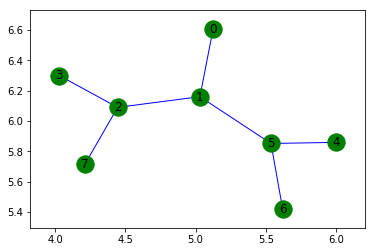

In [2]:
# List of points to be depcited on the route
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]
#Drive has to go from point 0 to 7. Let plot a node graph for the points
goal = 7
mapping={0:'Start', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7-Destination'} 
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G,k=.5,center=points_list[2])
nx.draw_networkx_nodes(G,pos,node_color='g')
nx.draw_networkx_edges(G,pos,edge_color='b')
nx.draw_networkx_labels(G,pos)
plt.show()

In [3]:
NO_OF_POINTS = 8

# create matrix x*y
R = np.matrix(np.ones(shape=(NO_OF_POINTS, NO_OF_POINTS)))
R *= -1

In [5]:
# R matrix
#R = np.matrix([[-1,0,-1,-1,-1,-1,-1,-1],
#               [0,-1,0,-1,-1,0,-1,-1],
#               [-1,0,-1,0,-1,-1,-1,100],
#               [-1,-1,0,-1,-1,-1,-1,-1],
#               [-1,-1,-1,-1,-1,0,-1,-1],
#               [-1,0,-1,0,-1,0,-1,-1],
#               [-1,-1,-1,-1,-1,0,-1,-1],
#               [-1,-1,0,-1,-1,-1,-1,100] ])
#print(R)

In [6]:
# assign 0 to paths and 100 to goal  point
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
R[goal,goal]= 100

R

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.]])

In [8]:
# Q matrix
Q = np.matrix (np.zeros([NO_OF_POINTS,NO_OF_POINTS]))
print(Q)
# Gamma (learning parameter)
gamma = 0.8
# Initial state (Usually to be chosen at random)
initial_state = 1

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [9]:
# This function returns all available actions in the state given as # an argument
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act
# Get available actions in the current state
available_act = available_actions(initial_state)
# This function chooses at random which action to be performed within the range of all the available actions
def sample_next_action(available_act):
    next_action = int(np.random.choice(available_act,1))
    return next_action
# Sample next action to be performed
action = sample_next_action(available_act)

In [10]:
# This function updates the Q matrix according to the path selected and the Q learning algorithm
def update(current_state, action, gamma):  
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]   
    Q[current_state, action] = R[current_state, action] + gamma * max_value
update(initial_state,action,gamma)
print(Q)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [11]:
# Train over 10 000 iterations(Re-iterate the # process above)
for i in range(10000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    update(current_state,action,gamma)
print(Q)

[[  0.  320.    0.    0.    0.    0.    0.    0. ]
 [256.    0.  400.    0.    0.  256.    0.    0. ]
 [  0.  320.    0.  320.    0.    0.    0.  500. ]
 [  0.    0.  400.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.  256.    0.    0. ]
 [  0.  320.    0.    0.  204.8   0.  204.8   0. ]
 [  0.    0.    0.    0.    0.  256.    0.    0. ]
 [  0.    0.  400.    0.    0.    0.    0.  500. ]]


In [12]:
# Normalize the "trained" Q matrix
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

Trained Q matrix:
[[  0.    64.     0.     0.     0.     0.     0.     0.  ]
 [ 51.2    0.    80.     0.     0.    51.2    0.     0.  ]
 [  0.    64.     0.    64.     0.     0.     0.   100.  ]
 [  0.     0.    80.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.    51.2    0.     0.  ]
 [  0.    64.     0.     0.    40.96   0.    40.96   0.  ]
 [  0.     0.     0.     0.     0.    51.2    0.     0.  ]
 [  0.     0.    80.     0.     0.     0.     0.   100.  ]]


In [13]:
current_state = 0
steps = [current_state]
while current_state != 7:
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size=1))
    else:
        next_step_index = int(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index
# Print selected sequence of steps
print("Selected path:")
print(steps)

Selected path:
[0, 1, 2, 7]
